In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.utils import to_categorical


In [2]:
# Load the dataset
data = pd.read_csv("/content/loan.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [28]:
data['Loan_Status'].value_counts()

,count
Loan_Status,
1,422
0,192


In [5]:
data.describe(include='all')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001002,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


In [6]:
data.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [8]:
missing_values = data.isnull().sum()
print(missing_values)


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [10]:
data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)

<ipython-input-10-a27e2e7ce857>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)


In [11]:
data['LoanAmount'].fillna(data['LoanAmount'].median(), inplace=True)

<ipython-input-11-72a8c04135bb>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['LoanAmount'].fillna(data['LoanAmount'].median(), inplace=True)


<ipython-input-36-46fcd90ec15c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Loan_Status", data=data, palette="viridis")


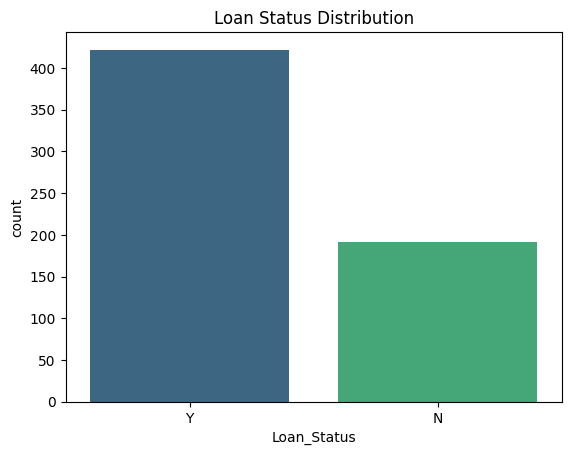

In [ ]:
# Visualizations
sns.countplot(x="Loan_Status", data=data, palette="viridis")
plt.title("Loan Status Distribution")
plt.show()

<Axes: xlabel='ApplicantIncome'>

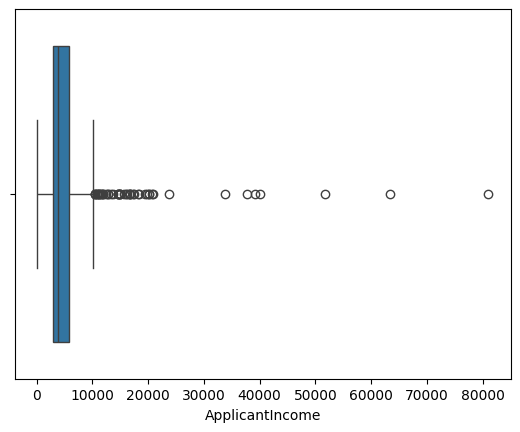

In [13]:
import seaborn as sns
sns.boxplot(data['ApplicantIncome'],orient='h')

In [14]:
import numpy as np
data['ApplicantIncome'] = np.log1p(data['ApplicantIncome'])

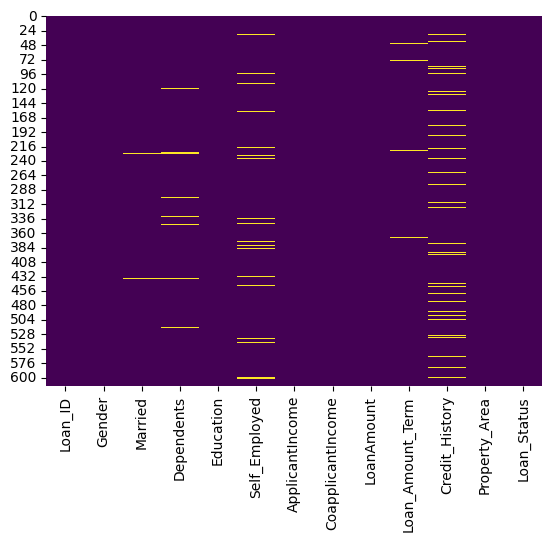

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.show()

<Axes: xlabel='Loan_Status', ylabel='count'>

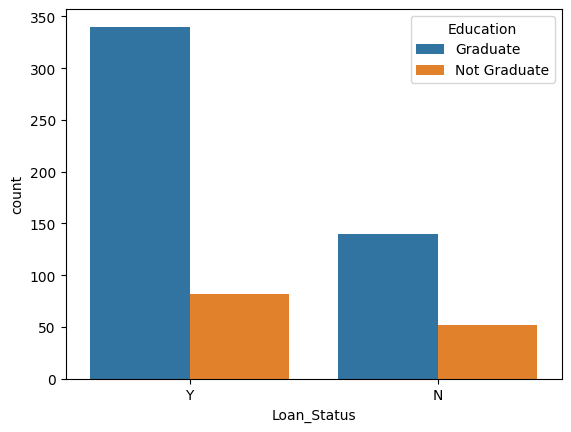

In [18]:
sns.countplot(x='Loan_Status', hue='Education', data=data)

<Axes: xlabel='Loan_Status', ylabel='ApplicantIncome'>

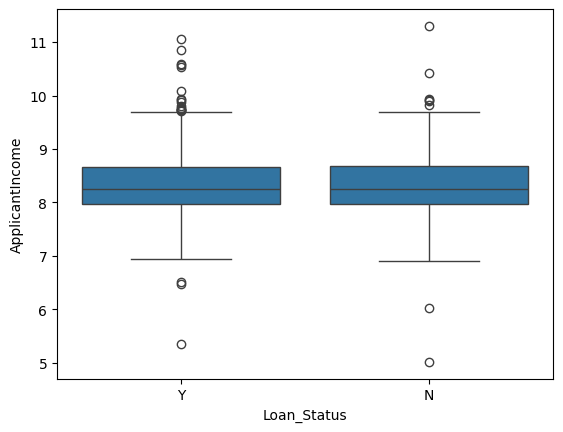

In [19]:
sns.boxplot(x='Loan_Status', y='ApplicantIncome', data=data)

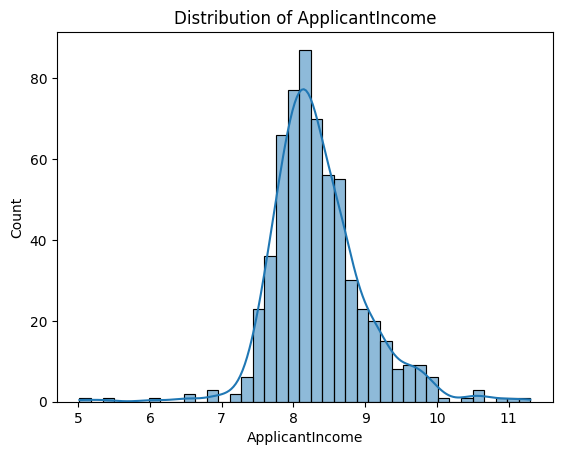

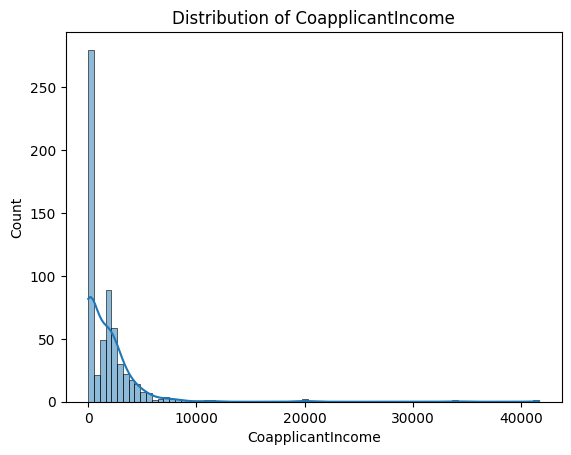

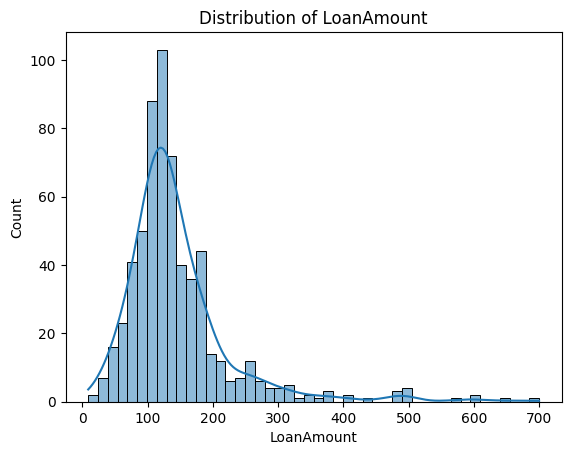

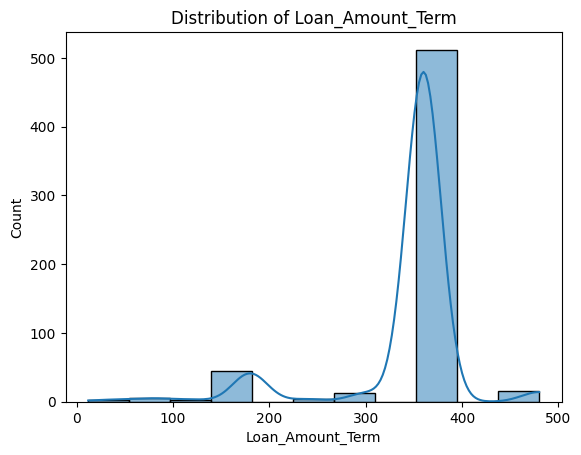

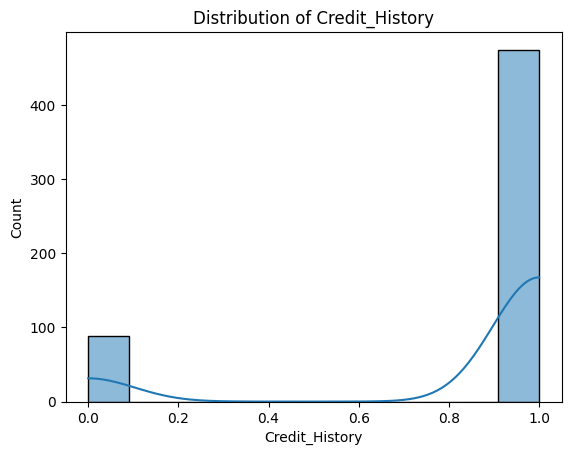

In [21]:
# Distribution of numerical features
numerical_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
for feature in numerical_features:
    sns.histplot(data[feature], kde=True)
    plt.title(f"Distribution of {feature}")
    plt.show()

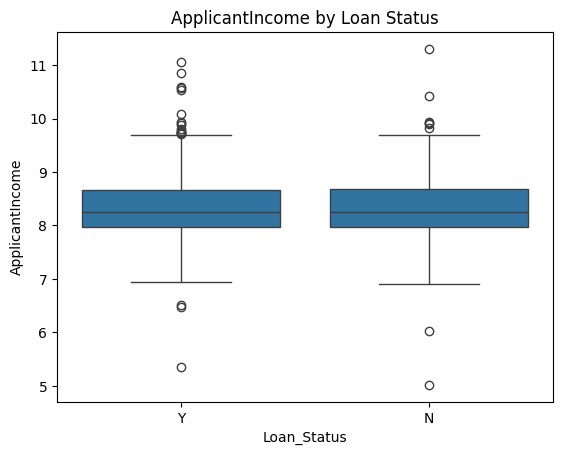

In [22]:
# Boxplot for ApplicantIncome
sns.boxplot(x="Loan_Status", y="ApplicantIncome", data=data)
plt.title("ApplicantIncome by Loan Status")
plt.show()

In [23]:
# Impute missing values
num_imputer = SimpleImputer(strategy="median")
cat_imputer = SimpleImputer(strategy="most_frequent")

numerical_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
data[numerical_features] = num_imputer.fit_transform(data[numerical_features])

categorical_features = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Education', 'Property_Area']
data[categorical_features] = cat_imputer.fit_transform(data[categorical_features])

# Encode categorical features
label_encoders = {}
for col in categorical_features + ['Loan_Status']:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Scale numerical features
scaler = StandardScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Drop unnecessary columns
data.drop(columns=["Loan_ID"], inplace=True)


In [24]:
# Split dataset
X = data.drop(columns=["Loan_Status"])
y = data["Loan_Status"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_accuracy = dt_model.score(X_test, y_test)

# Evaluate the model
y_pred = dt_model.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Decision Tree Accuracy: 0.6910569105691057
Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.53      0.55        43
           1       0.76      0.78      0.77        80

    accuracy                           0.69       123
   macro avg       0.66      0.65      0.66       123
weighted avg       0.69      0.69      0.69       123



In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# One-hot encode the target variable for neural networks
y_train_cnn = to_categorical(y_train)
y_test_cnn = to_categorical(y_test)

In [26]:
mlp_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])
mlp_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_mlp = mlp_model.fit(X_train, y_train_cnn, epochs=20, batch_size=16, validation_split=0.2, verbose=0)

# Evaluate MLP
mlp_loss, mlp_accuracy = mlp_model.evaluate(X_test, y_test_cnn, verbose=0)
print("MLP Results:")
print("Accuracy:", mlp_accuracy)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MLP Results:
Accuracy: 0.7886179089546204



Comparison of Models:
           Model  Accuracy
0  Decision Tree  0.691057
1            MLP  0.788618


<ipython-input-27-a6d8f4895895>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="Accuracy", data=results, palette="viridis")


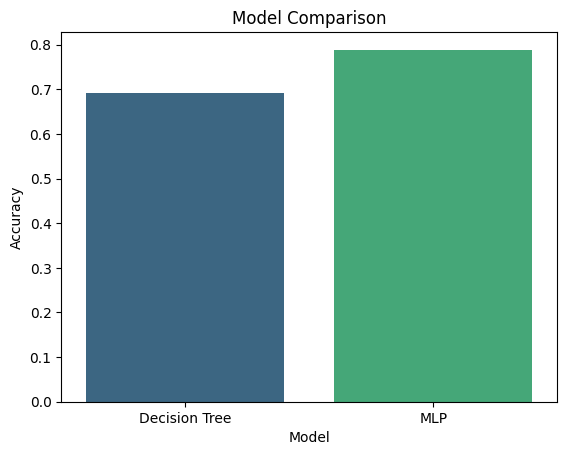

In [27]:
# Compare Results
results = pd.DataFrame({
    "Model": ["Decision Tree", "MLP"],
    "Accuracy": [dt_accuracy, mlp_accuracy]
})

print("\nComparison of Models:")
print(results)

# Plot Results
sns.barplot(x="Model", y="Accuracy", data=results, palette="viridis")
plt.title("Model Comparison")
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.show()